In [1]:
import numpy as np
import sympy as sym
from sympy.vector import CoordSys3D

import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

%matplotlib widget

# Gaussian & Weingarten mapping

Given
$$ r(t) = (u\cos v, 2u\sin v, u^2),$$
We have
$$\begin{align}
r_u &= (\cos v, 2\sin v, 2u)\\
r_v &= (-u\sin v, 2u\cos v, 0)
\end{align}$$

In [2]:
u, v = sym.symbols('u v', real=True)
x = u * sym.cos(v)
y = 2 * u * sym.sin(v)
z = u**2

In [3]:
N = CoordSys3D('N')
r = x*N.i + y*N.j + z*N.k
r

(u*cos(v))*N.i + (2*u*sin(v))*N.j + u**2*N.k

In [4]:
ru = r.diff(u)
rv = r.diff(v)
n = ru.cross(rv).normalize()
nu = n.diff(u)
nv = n.diff(v)

xf = sym.lambdify([u, v], r.components.get(N.i, 0), 'numpy')
yf = sym.lambdify([u, v], r.components.get(N.j, 0), 'numpy')
zf = sym.lambdify([u, v], r.components.get(N.k, 0), 'numpy')

rux = sym.lambdify([u, v], ru.components.get(N.i, 0), 'numpy')
ruy = sym.lambdify([u, v], ru.components.get(N.j, 0), 'numpy')
ruz = sym.lambdify([u, v], ru.components.get(N.k, 0), 'numpy')

rvx = sym.lambdify([u, v], rv.components.get(N.i, 0), 'numpy')
rvy = sym.lambdify([u, v], rv.components.get(N.j, 0), 'numpy')
rvz = sym.lambdify([u, v], rv.components.get(N.k, 0), 'numpy')

nx = sym.lambdify([u, v], n.components.get(N.i, 0), 'numpy')
ny = sym.lambdify([u, v], n.components.get(N.j, 0), 'numpy')
nz = sym.lambdify([u, v], n.components.get(N.k, 0), 'numpy')

nux = sym.lambdify([u, v], nu.components.get(N.i, 0), 'numpy')
nuy = sym.lambdify([u, v], nu.components.get(N.j, 0), 'numpy')
nuz = sym.lambdify([u, v], nu.components.get(N.k, 0), 'numpy')

nvx = sym.lambdify([u, v], nv.components.get(N.i, 0), 'numpy')
nvy = sym.lambdify([u, v], nv.components.get(N.j, 0), 'numpy')
nvz = sym.lambdify([u, v], nv.components.get(N.k, 0), 'numpy')

In [5]:
ru

(cos(v))*N.i + (2*sin(v))*N.j + 2*u*N.k

In [6]:
rv

(-u*sin(v))*N.i + (2*u*cos(v))*N.j

0

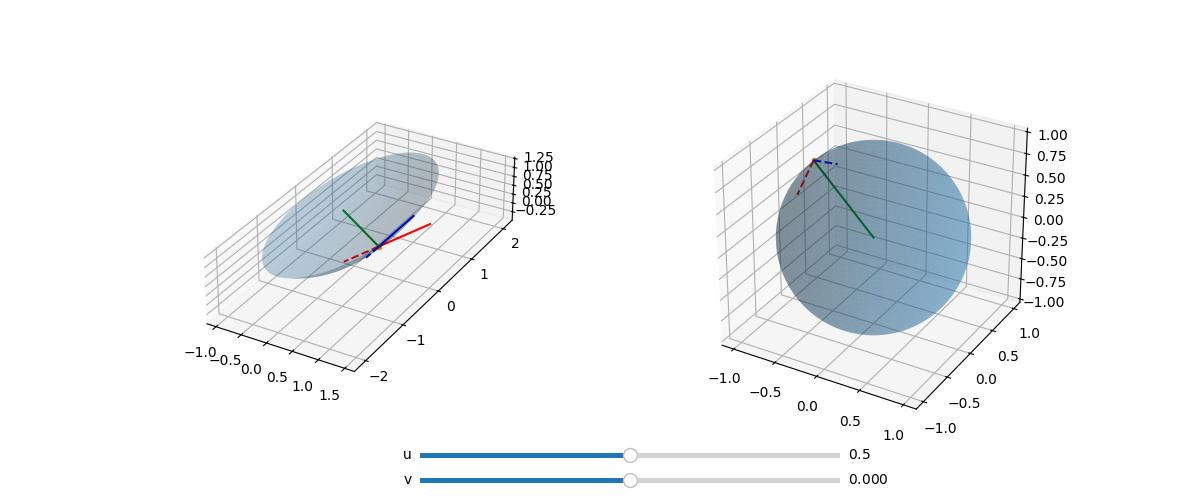

In [13]:
U, V = np.mgrid[0:1:100j, -np.pi:np.pi:100j]

plt.close()
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.plot_surface(xf(U, V), yf(U, V), zf(U, V), alpha=0.3)
ax.set_aspect('equal')

UU, VV = np.mgrid[0:2*np.pi:100j, -0.5*np.pi:0.5*np.pi:100j]
sx = fig.add_subplot(1, 2, 2, projection="3d", shareview=ax)
sx.plot_surface(np.cos(UU)*np.cos(VV), np.sin(UU)*np.cos(VV), np.sin(VV), alpha=0.3)
sx.set_aspect('equal')

fig.subplots_adjust(bottom=0.15)
axu = fig.add_axes([0.35, 0.08, 0.35, 0.02])
axv = fig.add_axes([0.35, 0.03, 0.35, 0.02])

up = 0.5
vp = 0

xp, yp, zp = xf(up, vp), yf(up, vp), zf(up, vp)
ruxp, ruyp, ruzp = xp + rux(up, vp), yp + ruy(up, vp), zp + ruz(up, vp)
rvxp, rvyp, rvzp = xp + rvx(up, vp), yp + rvy(up, vp), zp + rvz(up, vp)
nxp, nyp, nzp = xp + nx(up, vp), yp + ny(up, vp), zp + nz(up, vp)
nuxp, nuyp, nuzp = xp + nux(up, vp), yp + nuy(up, vp), zp + nuz(up, vp)
nvxp, nvyp, nvzp = xp + nvx(up, vp), yp + nvy(up, vp), zp + nvz(up, vp)

p, = ax.plot([xp], [yp], [zp], '.')
ap, = ax.plot([xp, ruxp], [yp, ruyp], [zp, ruzp], color='r')
bp, = ax.plot([xp, rvxp], [yp, rvyp], [zp, rvzp], color='b')
cp, = ax.plot([xp, nxp], [yp, nyp], [zp, nzp], color='g')
anap, = ax.plot([xp, nuxp], [yp, nuyp], [zp, nuzp], ls='--', color='r')
anbp, = ax.plot([xp, nvxp], [yp, nvyp], [zp, nvzp], ls='--', color='b')

snxp, snyp, snzp = nx(up, vp), ny(up, vp), nz(up, vp)
nuxp, nuyp, nuzp = nxp + nux(up, vp), nyp + nuy(up, vp), nzp + nuz(up, vp)
nvxp, nvyp, nvzp = nxp + nvx(up, vp), nyp + nvy(up, vp), nzp + nvz(up, vp)

npp, = sx.plot([snxp], [snyp], [snzp], '.')
ncp, = sx.plot([0, snxp], [0, snyp], [0, snzp], color='g')
nap, = sx.plot([snxp, nuxp], [snyp, nuyp], [snzp, nuzp], ls='--', color='r')
nbp, = sx.plot([snxp, nvxp], [snyp, nvyp], [snzp, nvzp], ls='--', color='b')

u_slider = Slider(
    ax=axu,
    label='u',
    valmin=0,
    valmax=1,
    valinit=up,
)

v_slider = Slider(
    ax=axv,
    label='v',
    valmin=-np.pi,
    valmax=np.pi,
    valinit=vp,
)

def update(val):
    up = u_slider.val
    vp = v_slider.val

    xp, yp, zp = xf(up, vp), yf(up, vp), zf(up, vp)
    ruxp, ruyp, ruzp = xp + rux(up, vp), yp + ruy(up, vp), zp + ruz(up, vp)
    rvxp, rvyp, rvzp = xp + rvx(up, vp), yp + rvy(up, vp), zp + rvz(up, vp)
    nxp, nyp, nzp = xp + nx(up, vp), yp + ny(up, vp), zp + nz(up, vp)
    nuxp, nuyp, nuzp = xp + nux(up, vp), yp + nuy(up, vp), zp + nuz(up, vp)
    nvxp, nvyp, nvzp = xp + nvx(up, vp), yp + nvy(up, vp), zp + nvz(up, vp)

    p.set_data_3d([xf(up, vp)], [yf(up, vp)], [zf(up, vp)])
    ap.set_data_3d([xp, ruxp], [yp, ruyp], [zp, ruzp])
    bp.set_data_3d([xp, rvxp], [yp, rvyp], [zp, rvzp])
    cp.set_data_3d([xp, nxp], [yp, nyp], [zp, nzp])
    anap.set_data_3d([xp, nuxp], [yp, nuyp], [zp, nuzp])
    anbp.set_data_3d([xp, nvxp], [yp, nvyp], [zp, nvzp])

    snxp, snyp, snzp = nx(up, vp), ny(up, vp), nz(up, vp)
    nuxp, nuyp, nuzp = snxp + nux(up, vp), snyp + nuy(up, vp), snzp + nuz(up, vp)
    nvxp, nvyp, nvzp = snxp + nvx(up, vp), snyp + nvy(up, vp), snzp + nvz(up, vp)

    npp.set_data_3d([snxp], [snyp], [snzp])
    ncp.set_data_3d([0, snxp], [0, snyp], [0, snzp])
    nap.set_data_3d([snxp, nuxp], [snyp, nuyp], [snzp, nuzp])
    nbp.set_data_3d([snxp, nvxp], [snyp, nvyp], [snzp, nvzp])
    
    fig.canvas.draw_idle()

u_slider.on_changed(update)
v_slider.on_changed(update)